In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('Andet/andet_data/Retirement_Age_Table.csv')[['Retirement Age', 'Generation']]
df['Year'] = df['Retirement Age'] + df['Generation']
df['Locked at 70'] = df['Retirement Age'].where(df['Retirement Age'] < 70, 70)
# Plot with step to reflect retirement policy changes

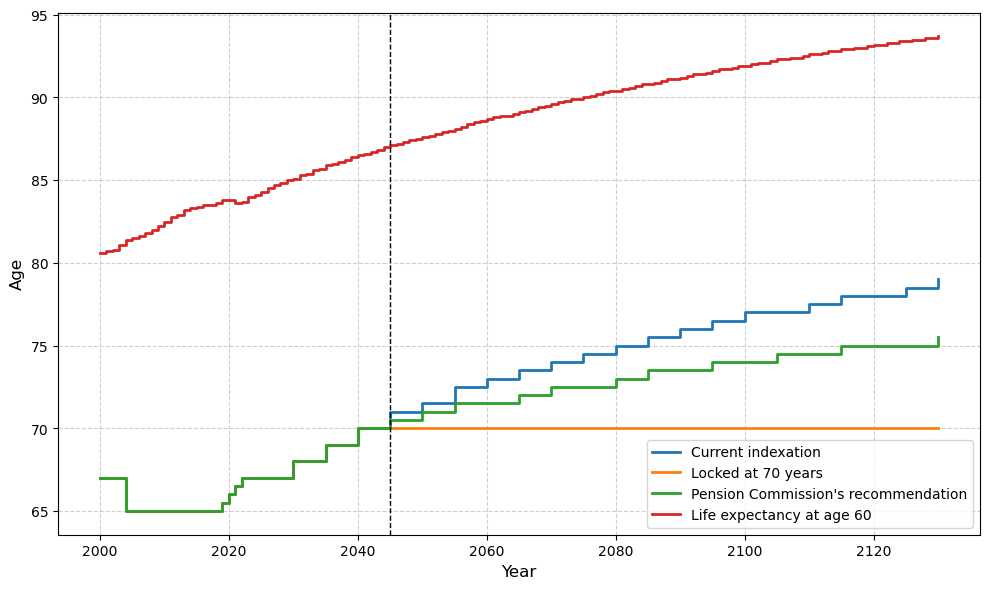

In [2]:
df = pd.read_excel('Andet/andet_data/dataark-figurer-og-tabeller.xlsx', sheet_name="Boks 1.4, Figur a", header=None).iloc[4:9,1:].T
df.columns = ['Year', 
 'Current indexation', 
 'Locked at 70 years', 
 "Pension Commission's recommendation", 
 'Life expectancy at age 60']

df = df.iloc[1:,:]
color_dict = {
    'Current Indexation': '#1f77b4',                      # Blue
    'Locked at 70 years': '#ff7f0e',                      # Orange
    "The pension Comittee's recommendation": '#2ca02c',   # Green
    "Expected life time of a 60 year-old": '#d62728'      # Red
}

plt.figure(figsize=(10, 6))

for the_str in df.columns[1:]:
    if the_str == 'Expected life time of a 60 year-old':
        # Force smooth by setting drawstyle='default' explicitly
        plt.plot(df['Year'], df[the_str], linewidth=2, label=the_str, drawstyle='default')
    else:
        plt.plot(df['Year'], df[the_str], linewidth=2, label=the_str, drawstyle='steps-post')

# plt.axvline(x=2025, color='black', linestyle='--', linewidth=1)
plt.axvline(x=2045, color='black', linestyle='--', linewidth=1)


# Style
plt.xlabel('Year', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
output_dir = 'pictures'
os.makedirs(output_dir, exist_ok=True)
# Save plot
output_path = os.path.join(output_dir, 'retirement_ages.png')
plt.savefig(output_path, dpi=300)
plt.show()


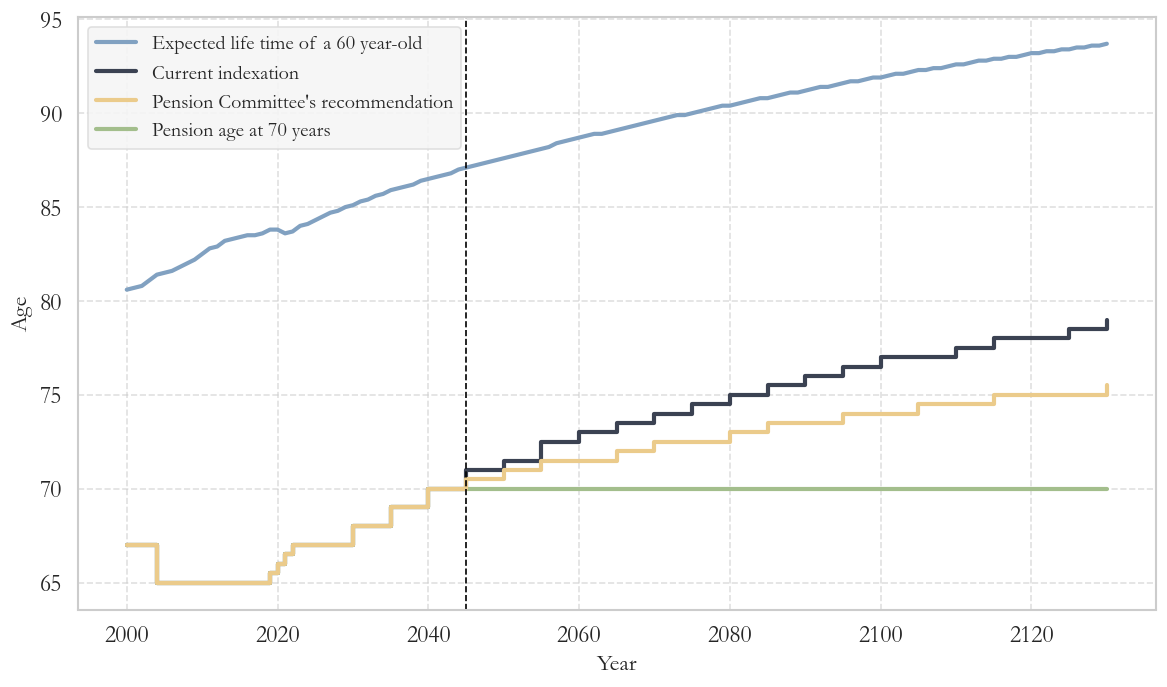

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from graph_format import COLOR_CYCLE, save_figure  # Import the color cycle and save function

# Set global seaborn style from graph_format
sns.set_theme(context="notebook", style="whitegrid", font="garamond", palette="deep", font_scale=1.3)

# Load and format data
df = pd.read_excel('Andet/andet_data/dataark-figurer-og-tabeller.xlsx', sheet_name="Boks 1.4, Figur a", header=None).iloc[4:9,1:].T
df.columns = ['Year', 
              'Current indexation', 
              'Pension age at 70 years', 
              "Pension Committee's recommendation", 
              'Life expectancy at age 60']
df = df.iloc[1:, :]
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Ensure Year is numeric

# Rename for consistency with color dict
renamed = {
    'Current indexation': 'Current indexation',
    'Locked at 70 years': 'Pension age at 70 years',
    "Pension Committee's recommendation": "Pension Committee's recommendation",
    'Life expectancy at age 60': "Expected life time of a 60 year-old"
}
df.rename(columns=renamed, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
for idx, col in enumerate(df.columns[1:]):
    if col == "Expected life time of a 60 year-old":
        plt.plot(df['Year'], df[col], label=col, color=COLOR_CYCLE[idx], linewidth=2.5, drawstyle='default')
    else:
        plt.plot(df['Year'], df[col], label=col, color=COLOR_CYCLE[idx], linewidth=2.5, drawstyle='steps-post')

plt.axvline(x=2045, color='black', linestyle='--', linewidth=1)

# Labels and styling
plt.xlabel('Year', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
order = [
    'Expected life time of a 60 year-old',
    'Current indexation',
    "Pension Committee's recommendation",
    'Pension age at 70 years'
]
handles, labels = plt.gca().get_legend_handles_labels()
sorted_handles = [h for l in order for h, lab in zip(handles, labels) if lab == l]
plt.legend(sorted_handles, order, fontsize=12, frameon=True)
plt.tight_layout()

# Save figure using predefined method
os.makedirs('pictures', exist_ok=True)
save_figure(plt.gcf(), 'retirement_ages.png')  # Uses the default directory in graph_format.py

plt.show()


In [4]:
import chardet

with open('Andet/andet_data/fremskrivning_data.csv', 'rb') as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [ ]:
df = pd.read_csv('Andet/andet_data/fremskrivning_data.csv', header=None)


columns_names = ['kon', 'herkomst', 'alder']


for i in np.arange(2024,2070+1):
    columns_names.append(f'{i}')
columns_names

In [61]:



columns_names = ['kon', 'herkomst', 'alder']


for i in np.arange(2024,2070+1):
    columns_names.append(f'{i}')
columns_names


['kon',
 'herkomst',
 'alder',
 '2024',
 '2025',
 '2026',
 '2027',
 '2028',
 '2029',
 '2030',
 '2031',
 '2032',
 '2033',
 '2034',
 '2035',
 '2036',
 '2037',
 '2038',
 '2039',
 '2040',
 '2041',
 '2042',
 '2043',
 '2044',
 '2045',
 '2046',
 '2047',
 '2048',
 '2049',
 '2050',
 '2051',
 '2052',
 '2053',
 '2054',
 '2055',
 '2056',
 '2057',
 '2058',
 '2059',
 '2060',
 '2061',
 '2062',
 '2063',
 '2064',
 '2065',
 '2066',
 '2067',
 '2068',
 '2069',
 '2070']

In [62]:
df.columns = columns_names

In [79]:
df = pd.read_csv('Andet/andet_data/fremskrivning_data.csv', header=None)
columns_names = ['kon', 'herkomst', 'alder']
for i in np.arange(2024,2070+1):
    columns_names.append(f'{i}')
columns_names
df.columns = columns_names
def age_group(age):
    age = int(age)
    if age <= 19:
        return 'Unge'
    elif age <= 59:
        return 'Arbejdsdygtige'
    else:
        return 'Gamle'

df['age_group'] = df['alder'].apply(age_group)
year_cols = [col for col in df.columns if col.isdigit()]
fremskrivning = df.groupby('age_group')[year_cols].sum().reset_index().T
fremskrivning.columns = fremskrivning.iloc[0,:]
fremskrivning = fremskrivning.iloc[1:,:]
fremskrivning

age_group,Arbejdsdygtige,Gamle,Unge
2024,3072523,1599545,1289181
2025,3071177,1629140,1284144
2026,3042284,1655491,1269193
2027,3029765,1688311,1263544
2028,3022007,1714853,1259309
2029,3020148,1735566,1254730
2030,3018543,1752884,1252880
2031,3016788,1769836,1251069
2032,3007352,1789215,1253947
2033,2995455,1809041,1258169


In [80]:
df_hist = pd.read_excel('Andet/andet_data/historisk_data_befolkning.xlsx', sheet_name="Sheet1").T
df_hist.columns = df_hist.iloc[0,:]
df_hist = df_hist.iloc[1:,:]

In [81]:
df_hist

Unnamed: 0,Unge,Arbejdsdygtige,Gamle
1901,1068000,1138100,241200
1902,1080800,1152900,243000
1903,1091400,1168900,245500
1904,1100900,1183600,247700
1905,1108900,1200700,250700
...,...,...,...
2021,1290250,3025409,1524386
2022,1289554,3037392,1546474
2023,1295381,3065606,1571667
2024,1289181,3072523,1599545


In [97]:
df_merge = pd.concat([df_hist.iloc[:-1,:],fremskrivning], axis=0)

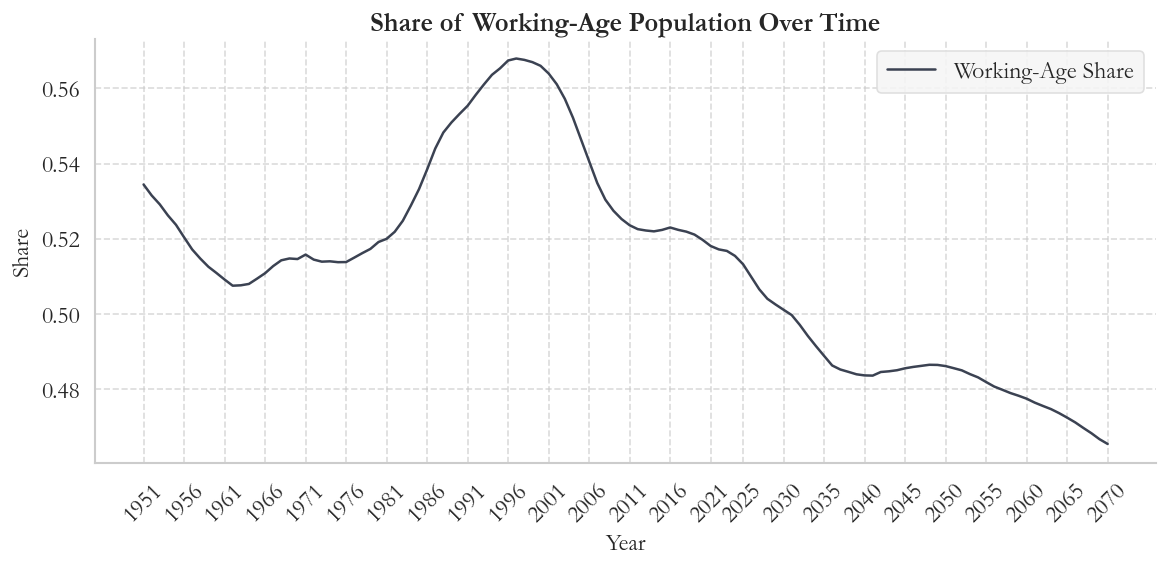

In [98]:
import matplotlib.pyplot as plt
from graph_format import custom_palette

# Compute ratio
share_working_age = df_merge['Arbejdsdygtige'] / (
    df_merge['Unge'] + df_merge['Arbejdsdygtige'] + df_merge['Gamle']
)

# Create figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot
ax.plot(df_merge.index[50:], share_working_age[50:], label="Working-Age Share", color=custom_palette[0])

# Formatting
ax.set_title("Share of Working-Age Population Over Time", fontsize=16, fontweight="bold")
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Share", fontsize=14)

# Show only every 5th year on the x-axis
tick_indices = df_merge.index[50::5]
ax.set_xticks(tick_indices)
ax.set_xticklabels(tick_indices, rotation=45)

ax.grid(True, linestyle="--", alpha=0.7)
ax.legend(frameon=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
pd.concat([df, df_hist.iloc[:-1,:]], axis=0).reset_index(drop=True).T


,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Unge,1097760,1090430,1084110,1077667,1072670,1067617,1065270,1063157,1065748,1069705,...,1315551,1311238,1310918,1306550,1301885,1296400,1290250,1289554,1295381,1289181
Arbejdsdygtige,2436517,2419416,2400494,2379891,2364548,2355632,2347131,2338857,2322420,2304356,...,2956218,2984732,3002823,3016982,3025463,3026001,3025409,3037392,3065606,3072523
Gamle,1483906,1506624,1530950,1557594,1577820,1591759,1602497,1612566,1625796,1638884,...,1387946,1411281,1435028,1457658,1478733,1500362,1524386,1546474,1571667,1599545


In [21]:
df.columns = df.iloc[0,:]
df

1,NaN,NaN,2024.0,2025.0,2026.0,2027.0,2028.0,2029.0,2030.0,2031.0,...,2061.0,2062.0,2063.0,2064.0,2065.0,2066.0,2067.0,2068.0,2069.0,2070.0
1,NaN,NaN,2024.0,2025.0,2026.0,2027.0,2028.0,2029.0,2030.0,2031.0,...,2061.0,2062.0,2063.0,2064.0,2065.0,2066.0,2067.0,2068.0,2069.0,2070.0
2,Mænd,0 år,25892.0,26601.0,27117.0,27549.0,27911.0,28204.0,28430.0,28598.0,...,27077.0,27192.0,27283.0,27350.0,27396.0,27414.0,27399.0,27353.0,27279.0,27181.0
3,NaN,1 år,26285.0,25917.0,26626.0,27143.0,27575.0,27938.0,28232.0,28458.0,...,26976.0,27108.0,27223.0,27314.0,27381.0,27427.0,27445.0,27430.0,27385.0,27311.0
4,NaN,2 år,28599.0,26306.0,25936.0,26645.0,27162.0,27595.0,27958.0,28252.0,...,26862.0,26997.0,27129.0,27245.0,27336.0,27403.0,27449.0,27467.0,27452.0,27406.0
5,NaN,3 år,27283.0,28613.0,26319.0,25948.0,26656.0,27174.0,27607.0,27971.0,...,26735.0,26875.0,27010.0,27142.0,27258.0,27349.0,27416.0,27462.0,27481.0,27466.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,NaN,101 år,228.0,243.0,253.0,226.0,228.0,225.0,243.0,244.0,...,1103.0,1171.0,1210.0,1270.0,1376.0,1427.0,1507.0,1601.0,1520.0,1423.0
210,NaN,102 år,165.0,129.0,139.0,147.0,132.0,134.0,134.0,145.0,...,695.0,710.0,755.0,781.0,821.0,891.0,925.0,978.0,1040.0,989.0
211,NaN,103 år,86.0,88.0,70.0,76.0,81.0,73.0,75.0,75.0,...,410.0,423.0,433.0,461.0,478.0,502.0,546.0,567.0,601.0,640.0
212,NaN,104 år,38.0,43.0,44.0,36.0,39.0,42.0,39.0,40.0,...,230.0,235.0,243.0,249.0,265.0,275.0,290.0,315.0,328.0,347.0


In [102]:
df = pd.read_excel('andet_data/dataark-figurer-og-tabeller.xlsx', sheet_name="Boks 1.4, Figur b", header=None).iloc[5:-1,1:3].T
df.drop(df.index[0], inplace=True)
df.columns = [ 'Current indexation',  "Pension Commission's recommendation",'Locked at 70 years']
plt.bar(df.columns, df.iloc[0])

FileNotFoundError: [Errno 2] No such file or directory: 'andet_data/dataark-figurer-og-tabeller.xlsx'

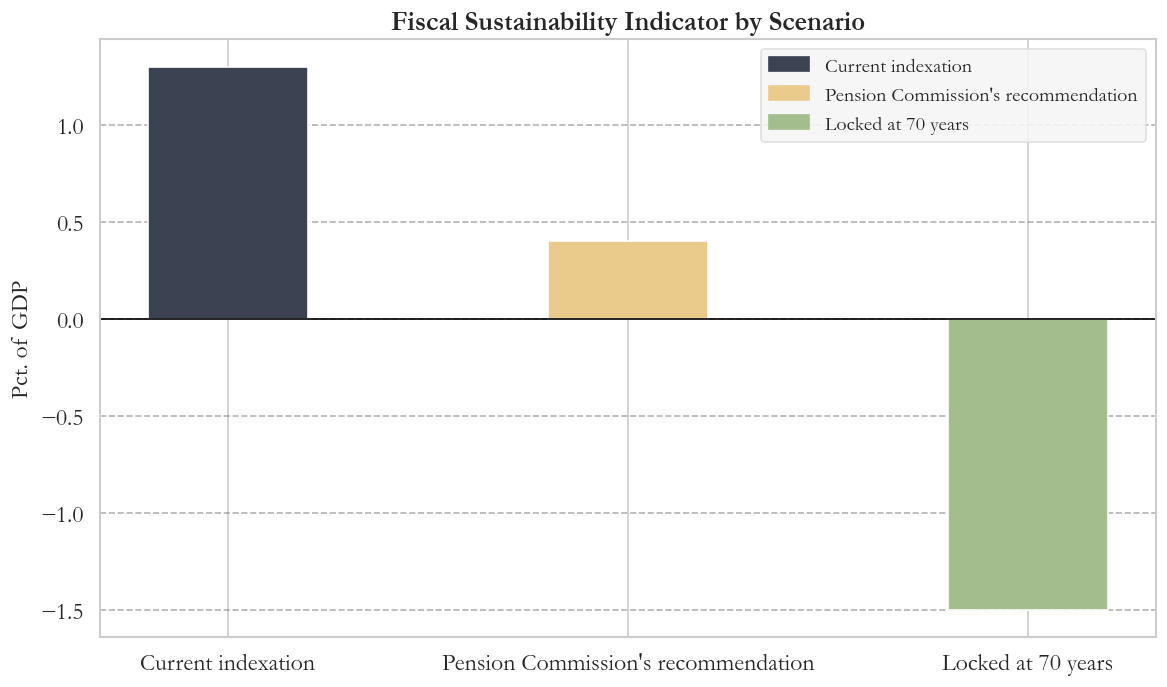

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from graph_format import custom_palette, save_figure, DEFAULT_SAVE_DIR

# --- Load and prepare data ---
df = pd.read_excel('Andet/andet_data/dataark-figurer-og-tabeller.xlsx', sheet_name="Boks 1.4, Figur b", header=None).iloc[5:-1,1:3].T
df.drop(df.index[0], inplace=True)
df.columns = ['Current indexation', "Pension Commission's recommendation", 'Locked at 70 years']
df = df.astype(float)

# --- Colors and labels ---
labels = df.columns.tolist()
values = df.iloc[0].values
color_map = {
    'Current indexation': custom_palette[0],
    "Pension Commission's recommendation": custom_palette[2],
    'Locked at 70 years': custom_palette[1]
}
bar_colors = [color_map[label] for label in labels]

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, values, color=bar_colors, width=0.4)

# --- Formatting ---
ax.set_ylabel('Pct. of GDP', fontsize=14)
ax.set_title('Fiscal Sustainability Indicator by Scenario', fontsize=16, fontweight='bold')
ax.axhline(y=0, color='black', linewidth=1)
ax.grid(True, axis='y', linestyle='--', color='grey', alpha=0.6)

# --- Legend ---
handles = [Patch(color=color_map[label], label=label) for label in labels]
ax.legend(handles=handles, frameon=True, loc='upper right', fontsize=12)

# --- Ticks and layout ---
ax.tick_params(axis='x', labelrotation=0)
plt.tight_layout()

# --- Save and show ---
save_figure(fig, "Holdbarhedsindikator.png")
plt.show()


In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.patches import Patch

# Load and prep data
df = pd.read_excel('andet_data/dataark-figurer-og-tabeller.xlsx', sheet_name="Boks 1.4, Figur b", header=None).iloc[5:-1,1:3].T
df.drop(df.index[0], inplace=True)
df.columns = ['Current indexation', "Pension Commission's recommendation", 'Locked at 70 years']
df = df.astype(float)

# Color mapping
color_map = {
    'Current indexation': '#1f77b4',
    "Pension Commission's recommendation": '#2ca02c',
    'Locked at 70 years': '#ff7f0e'
}
bar_colors = [color_map[col] for col in df.columns]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(df.columns, df.iloc[0], color=bar_colors, width=0.4)

# Axes labels and grid
plt.ylabel('Pct. of GDP', fontsize=12)
plt.axhline(y=0, color='black', linewidth=1)
plt.grid(axis='y', linestyle='--', color='grey', alpha=0.6)

# Custom legend (no box)
custom_labels = list(df.columns)
handles = [Patch(color=color_map[label], label=label) for label in custom_labels]
plt.legend(handles=handles, frameon=False, loc='upper right', fontsize=10)
# Ticks and layout
plt.xticks(rotation=0)
plt.tight_layout()

# Save figure
output_dir = 'pictures'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'Holdbarhedsindikator.png')
plt.savefig(output_path, dpi=300)

plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'andet_data/dataark-figurer-og-tabeller.xlsx'